In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer
import statsmodels.formula.api as smf
import statsmodels.api as sm
import missingno as msno

DATA_FOLDER = 'Data/'
HOUSEHOLD_DATASET = DATA_FOLDER+'PisoFirme_AEJPol-20070024_household.dta'
INDIVIDUAL_DATASET = DATA_FOLDER+'PisoFirme_AEJPol-20070024_individual.dta'

household = pd.read_stata(HOUSEHOLD_DATASET)
individual = pd.read_stata(INDIVIDUAL_DATASET)

sns.set()

In [2]:
household.head(7)

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.903487
1,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,17.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.615806
2,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.214608,10.819778
3,0.0,70000537.0,-103.50367,25.583067,7.0,47,0.3,0.036629,0.555554,819.0,...,20.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11.385092,11.918390
4,0.0,70000537.0,-103.50367,25.583067,7.0,47,0.3,0.036629,0.555554,819.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703783,10.819778
5,0.0,70000537.0,-103.50367,25.583067,7.0,41,0.3,0.036629,0.555554,819.0,...,25.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,4.605170,8.517193
6,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,18.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,5.857933,9.615806


In [3]:
individual.head(20)

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,S_age,S_gender,S_childma,S_childmaage,...,S_milkprogram,S_foodprogram,S_seguropopular,S_hasanimals,S_animalsinside,S_garbage,S_washhands,S_incomepc,S_cashtransfers,S_assetspc
0,0.0,70000537.0,-103.503670,25.583067,7.0,47,1.0,0,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844
1,0.0,70000537.0,-103.503670,25.583067,7.0,40,37.0,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1000.000000,0.0,53054.988281
2,0.0,70000537.0,-103.503670,25.583067,7.0,40,1.0,0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1100.000000,0.0,52930.226562
3,0.0,70000537.0,-103.503670,25.583067,7.0,47,43.0,hombre,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,660.416687,0.0,30632.578125
4,0.0,70000537.0,-103.503670,25.583067,7.0,47,4.0,hombre,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844
5,0.0,70000537.0,-103.503670,25.583067,7.0,40,4.0,hombre,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,560.000000,60.0,21200.611328
6,0.0,70000537.0,-103.503670,25.583067,7.0,40,18.0,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1100.000000,0.0,52930.226562
7,0.0,70000537.0,-103.503670,25.583067,7.0,40,3.0,0,0.0,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1108.333374,0.0,35087.679688
8,0.0,70000537.0,-103.503670,25.583067,7.0,47,5.0,hombre,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,660.416687,0.0,30632.578125
9,0.0,70000537.0,-103.503670,25.583067,7.0,40,30.0,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,560.000000,60.0,21200.611328


In [4]:
# We set the age of the mother to 0 if it said that there is no mother in the household 
temp = individual['S_childmaage'].copy()
msk = individual['S_childma'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childmaage'] = temp

In [5]:
# We set the years of educations to 0 if it said that there is no mother in the household
temp = individual['S_childmaeduc'].copy()
msk = individual['S_childma'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childmaeduc'] = temp

In [6]:
temp = individual['S_childpaage'].copy()
msk = individual['S_childpa'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childpaage'] = temp

In [7]:
temp = individual['S_childpaeduc'].copy()
msk = individual['S_childpa'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childpaeduc'] = temp

# Data processing

### A few stats

In [8]:
print("We have ",len(household.index)," households.")
print("We have ", len(household.columns)," variables for households.")
print("How many missing values is there ? ", household.isna().any().sum())

We have  2783  households.
We have  78  variables for households.
How many missing values is there ?  51


In [9]:
print("We have ",len(individual.index)," individuals.")
print("We have ", len(individual.columns)," variables for individuals.")
print("How many missing values is there ? ", individual.isna().any().sum())

We have  6693  individuals.
We have  89  variables for individuals.
How many missing values is there ?  24


### Missing value

In [10]:
Data_explo = individual.copy()
Data_explo = individual.drop(['idcluster', 'coord_x', 'coord_y', 'idmza', 'idmun'],axis=1)
col = Data_explo.columns
to_del = [j for j in col if not j.startswith('dtriage')]
Data_explo = Data_explo[to_del]
Data_explo['S_gender'] = Data_explo['S_gender'].apply(lambda x : 1 if type(x) == str else 0)

In [134]:
#We will generate a binary outcome vector indicating the global health status of the different persons. We will make 
#a combination of the different features about health.
#1 = health problems, 0 = good health
Data_explo["has_para"] = Data_explo['S_parcount']>=1
health = ['has_para', 'S_diarrhea', 'S_anemia', 'S_respira', 'S_skin', 'S_otherdis']
Data_explo["target"] = Data_explo[health].sum(axis=1)/6

In [135]:
Data_explo["target"].describe()

count    6693.000000
mean        0.119553
std         0.161983
min         0.000000
25%         0.000000
50%         0.000000
75%         0.166667
max         0.833333
Name: target, dtype: float64

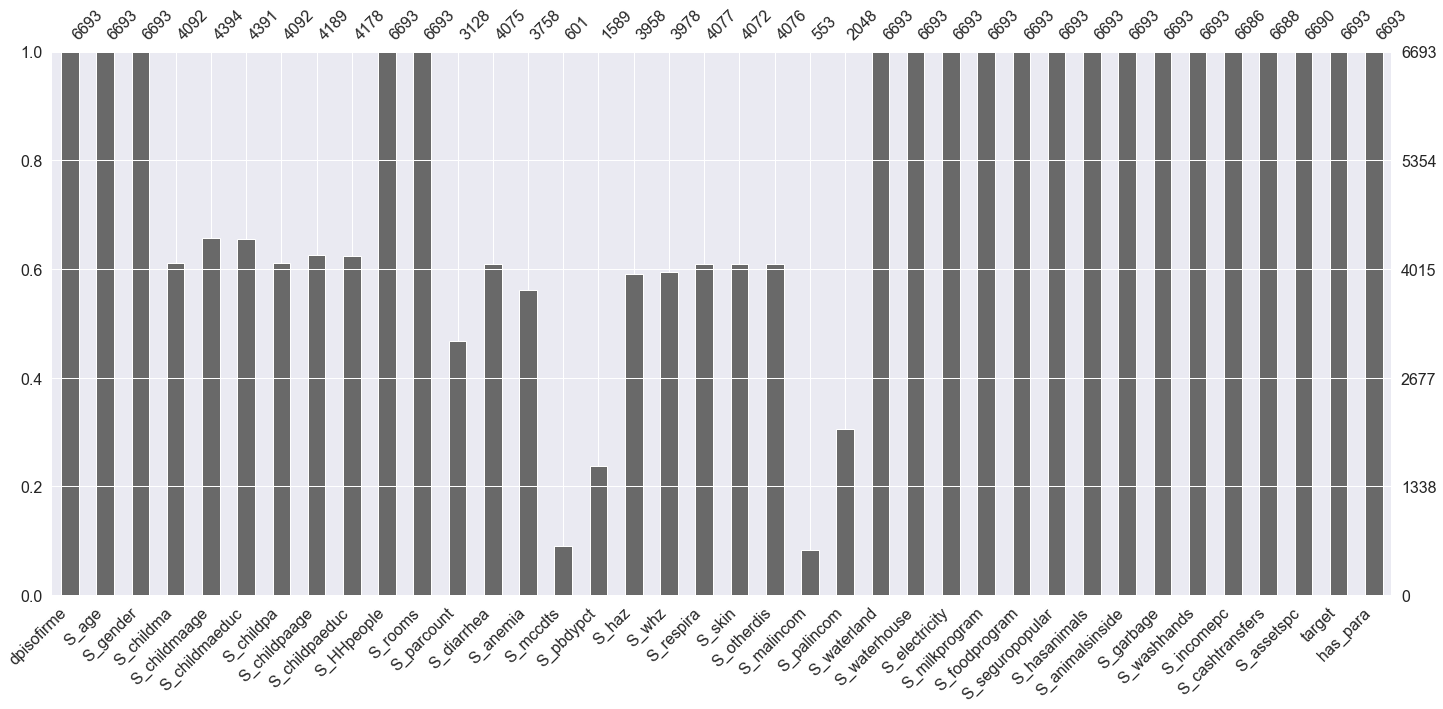

In [136]:
msno.bar(Data_explo)

In [137]:
msk_young = Data_explo.S_age.apply(lambda x: True if x < 15 else False)
Data_explo_young = Data_explo[msk_young]
Data_explo_old = Data_explo[~msk_young]

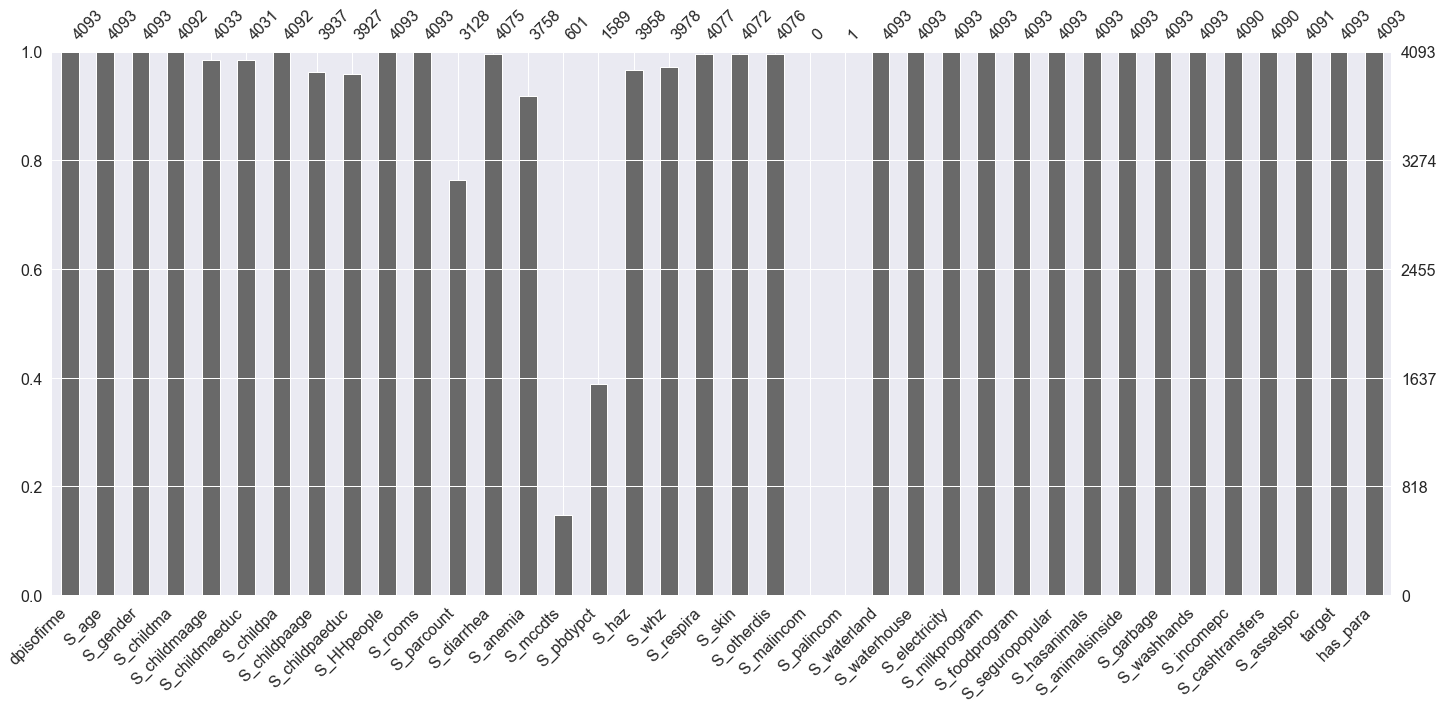

In [138]:
msno.bar(Data_explo_young)

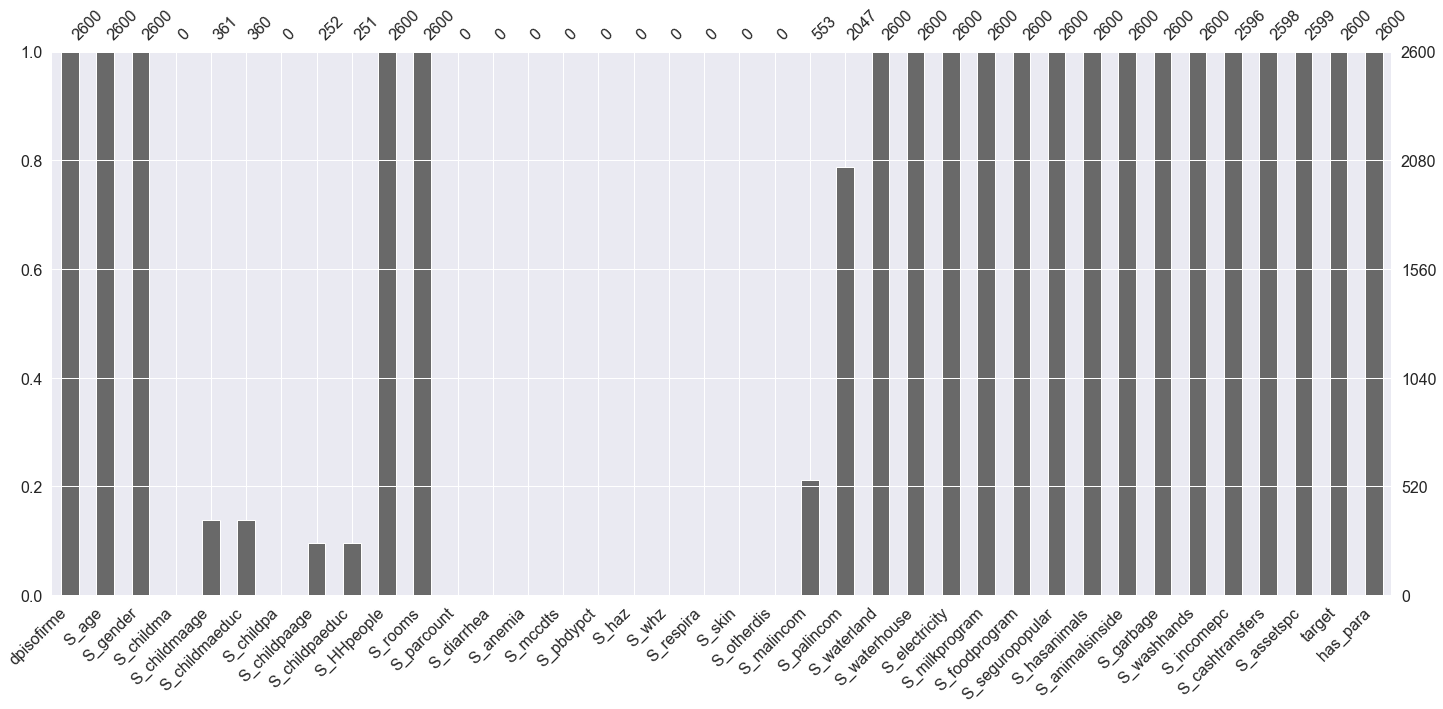

In [139]:
msno.bar(Data_explo_old)

### Plot the distribution 

In [143]:
features_many_NaN = [ "S_mccdts", "S_pbdypct","S_malincom", "S_palincom"]
Data_explo_young = Data_explo_young.drop(features_many_NaN,axis=1)

KeyError: "['S_mccdts' 'S_pbdypct' 'S_malincom' 'S_palincom'] not found in axis"

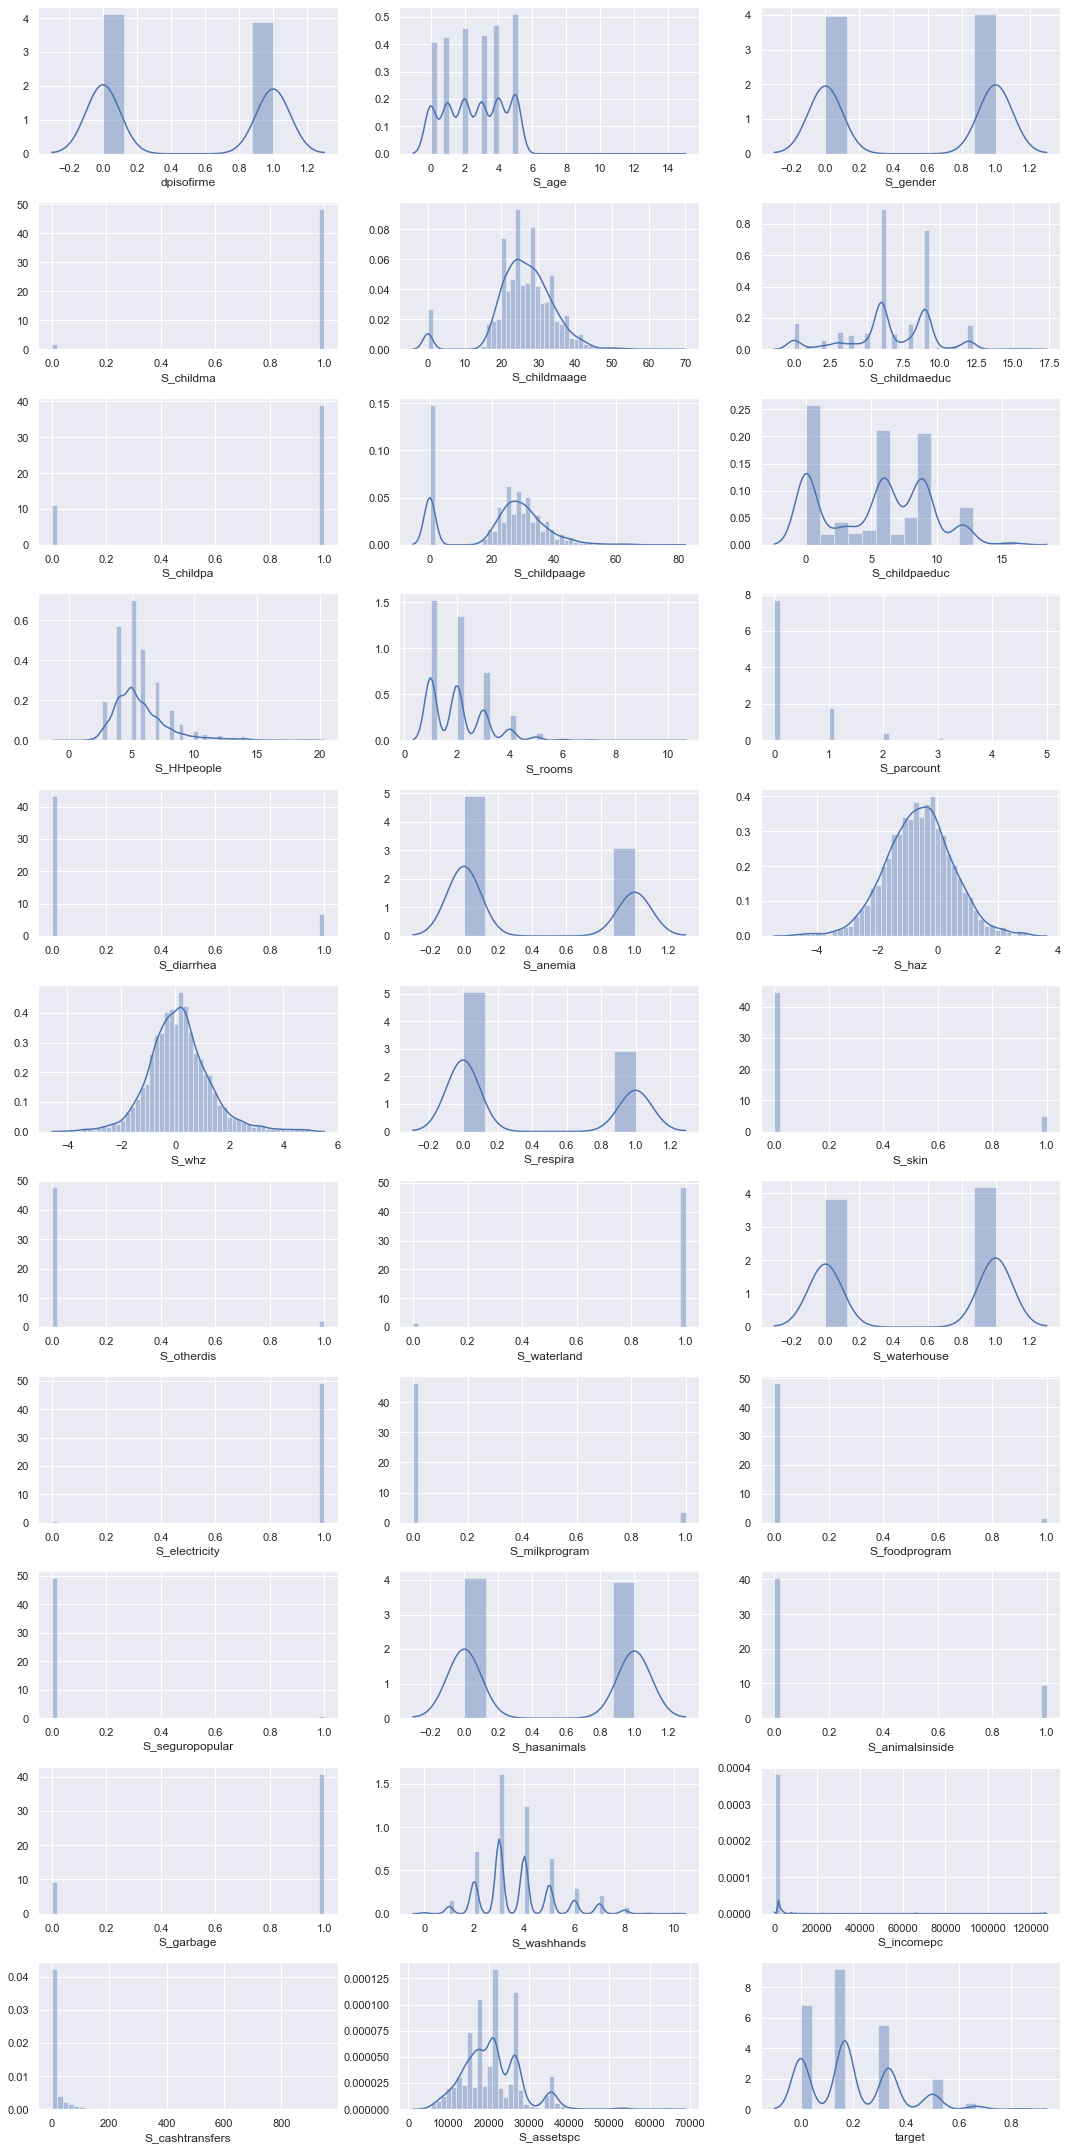

In [141]:
import warnings 
warnings.filterwarnings("ignore",category = UserWarning)

fig, axs = plt.subplots(11, 3, figsize=(15,30))
col = Data_explo_young.columns
for i in range(11):
    for j in range(3):
        sns.distplot(Data_explo_young[col[i*3+j]],ax = axs[i,j])
fig.tight_layout(pad=1.0)

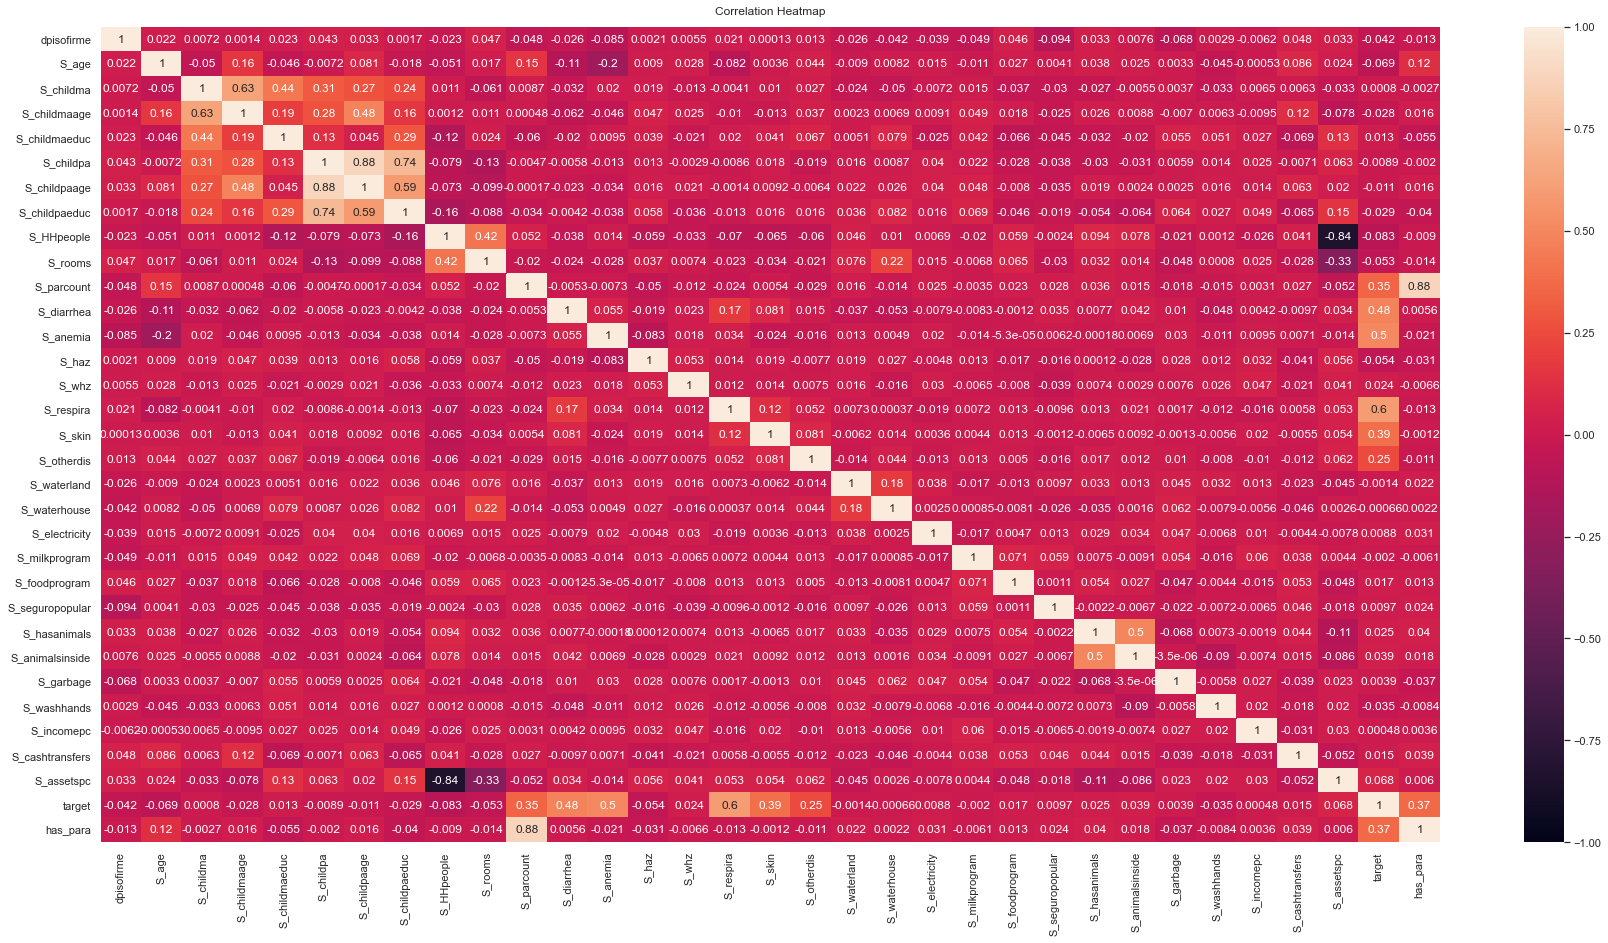

In [144]:
plt.figure(figsize=(30, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(Data_explo_young.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Implication of Depisofirme

In [145]:
treated = Data_explo_young.loc[Data_explo_young['dpisofirme'] == 1] #People attained by the programme
control = Data_explo_young.loc[Data_explo_young['dpisofirme'] == 0] #People didn't attain by the programme

In [146]:
treated.target.describe()

count    1981.000000
mean        0.188289
std         0.161956
min         0.000000
25%         0.000000
50%         0.166667
75%         0.333333
max         0.833333
Name: target, dtype: float64

In [147]:
control.target.describe()

count    2112.000000
mean        0.202257
std         0.172322
min         0.000000
25%         0.000000
50%         0.166667
75%         0.333333
max         0.833333
Name: target, dtype: float64

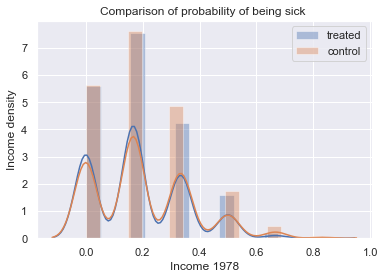

In [148]:
ax = sns.distplot(treated.target, hist=True, label='treated');
ax = sns.distplot(control.target, hist=True, label='control')
ax.set(title='Comparison of probability of being sick ',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

In [151]:
from statsmodels.stats.weightstats import ttest_ind

test = ttest_ind(treated.target, control.target, alternative='smaller', usevar ='pooled',value=0)

print("The t-value is ", test[0])
print("The p-value is ", test[1])

The t-value is  -2.6680360412168485
The p-value is  0.0038298459530854106


- Thus we can reject the null hypothesis 

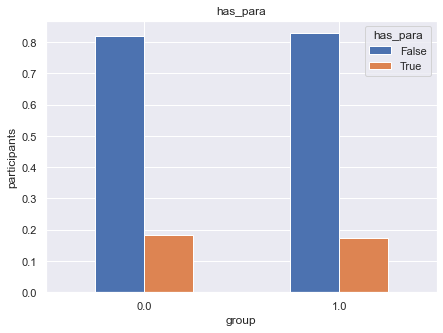

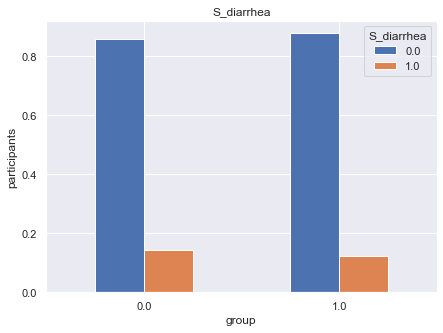

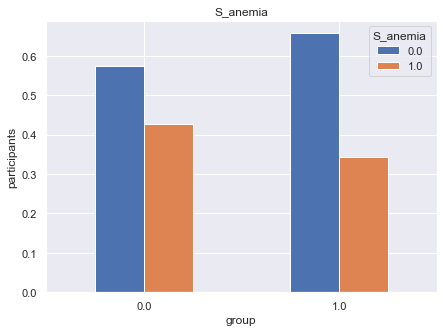

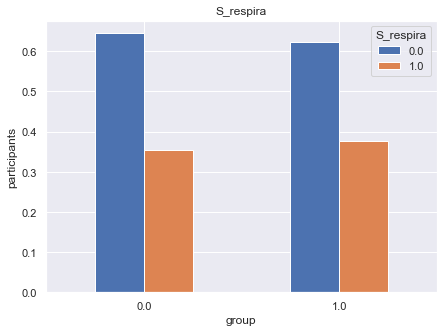

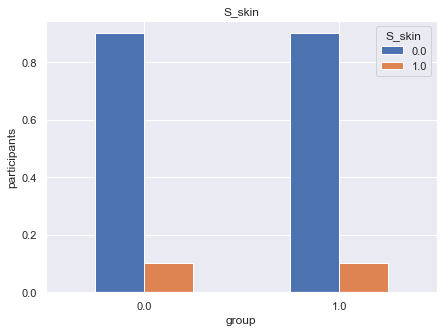

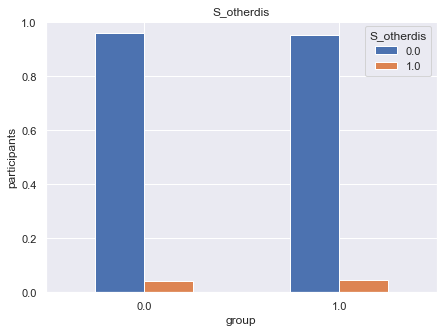

In [152]:
for disease in health  :
    group = Data_explo_young.groupby(['dpisofirme',disease])[disease].count()
    group = group.unstack()
    group = group.div(group.sum(axis=1), axis=0)
    pl = group.plot(kind='bar', figsize=[7,5], rot=0)
    pl.set_title(disease)
    pl.set_ylabel('participants')
    pl.set_xlabel('group')
    plt.show()

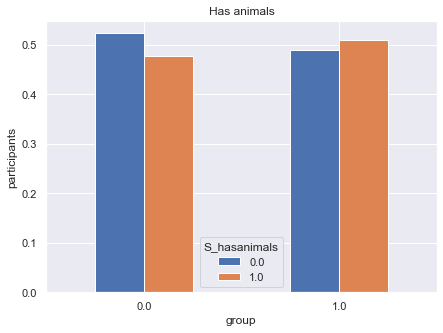

In [153]:
group = Data_explo_young.groupby(['dpisofirme', 'S_hasanimals'])['S_hasanimals'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('Has animals')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

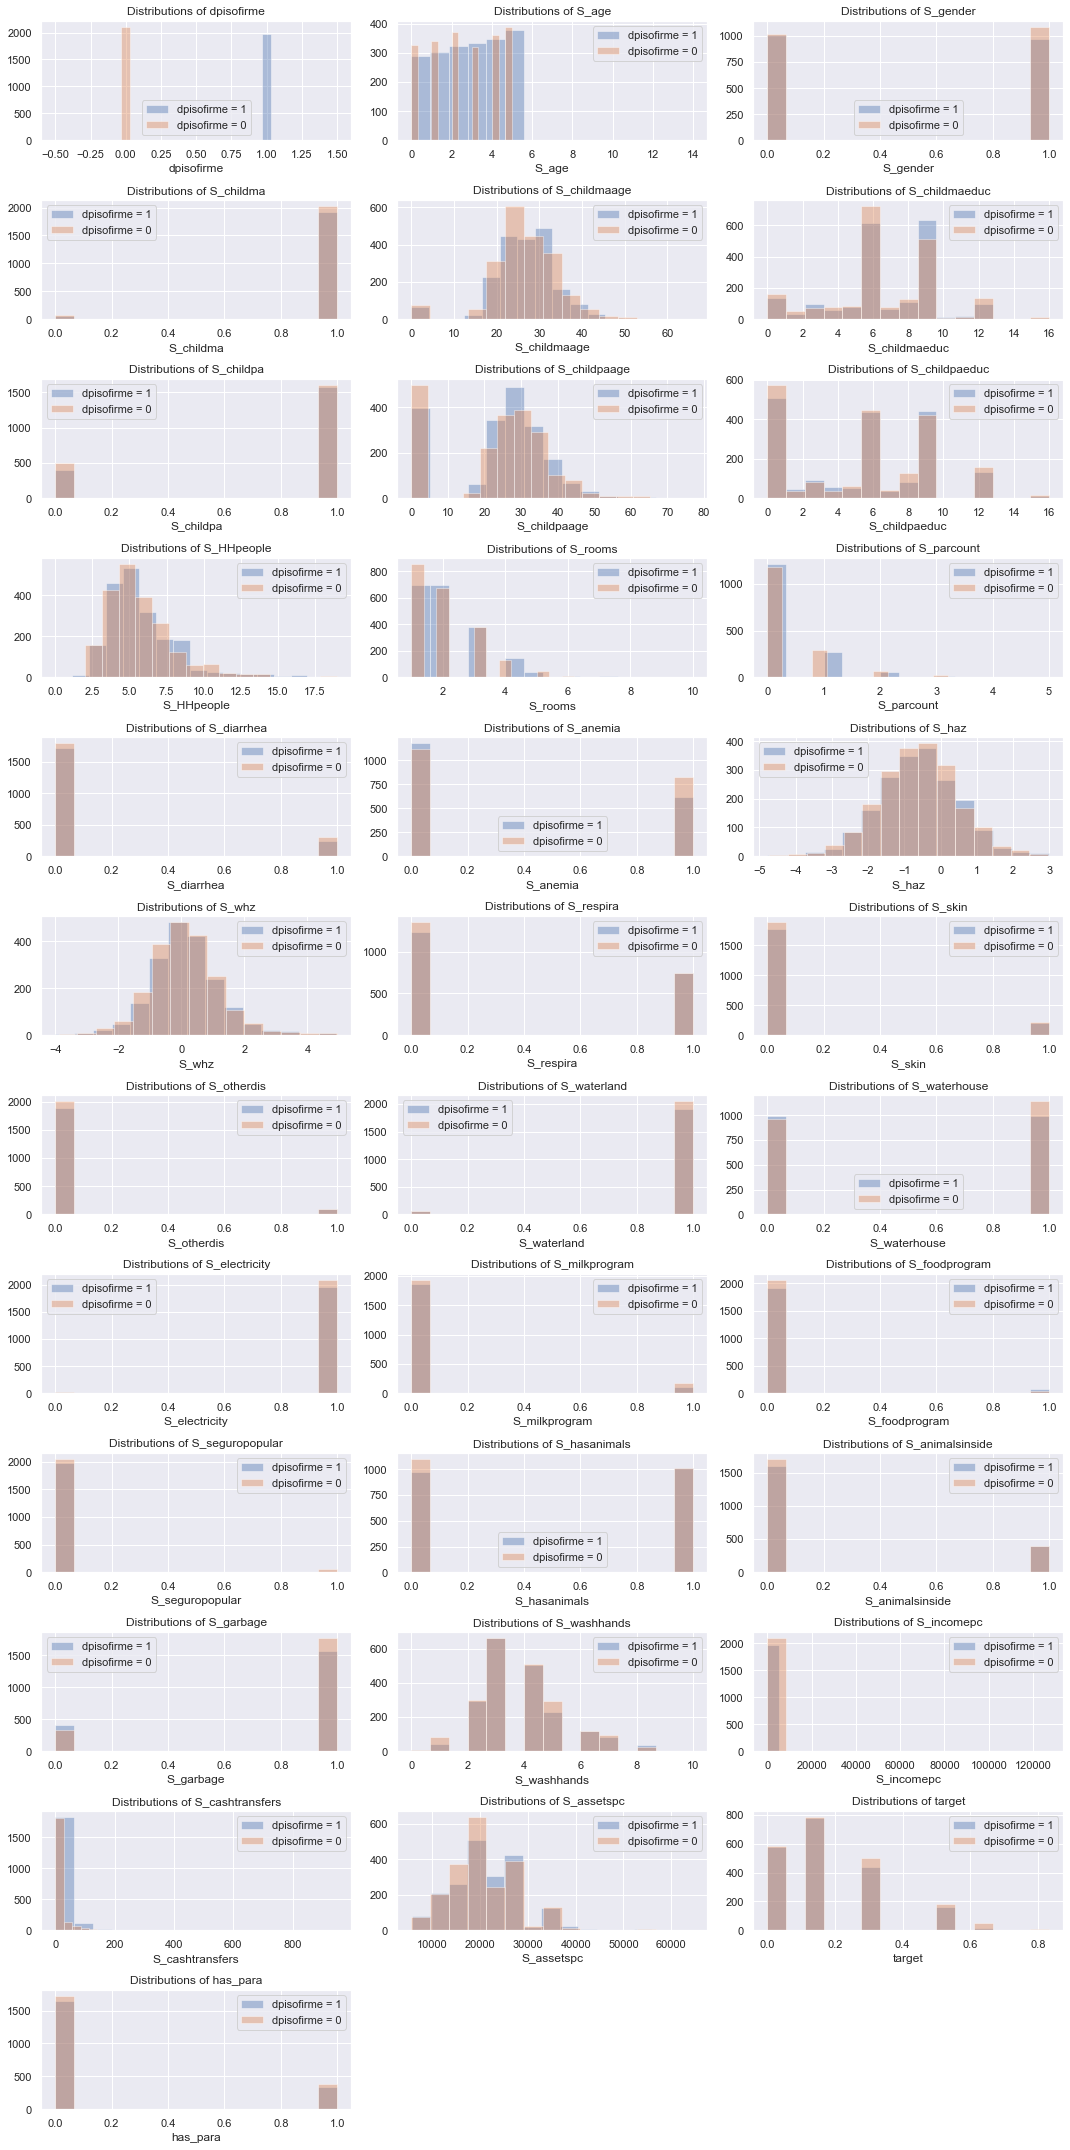

In [154]:
plt.figure(figsize=(15,30))
for idx, feature in enumerate(Data_explo_young.columns):
    plt.subplot(12, 3, idx+1)
    sns.distplot(treated[feature], bins = 15, kde = False, axlabel = feature)
    sns.distplot(control[feature], bins = 15, kde = False, axlabel = feature)
    ax = plt.gca()
    ax.set_title('Distributions of '+ feature )
    ax.legend(['dpisofirme = 1', 'dpisofirme = 0'])
plt.tight_layout(pad=1.0)
plt.show()

### Missing values

In [19]:
individual['S_gender'] = individual['S_gender'].apply(lambda x : 1 if type(x) == str else 0)

In [20]:
#Missing values will be imputed with a K-Nearest Neigbors algorithm
imputer = KNNImputer()

#Households
mod = imputer.fit(household)
H = pd.DataFrame(mod.transform(household))
H.columns = household.columns

#Individuals
temp = imputer.fit(individual)
I = pd.DataFrame(temp.transform(individual))
I.columns = individual.columns

In [21]:
H.head()

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819.0,...,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.903487
1,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819.0,...,17.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.615806
2,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.214608,10.819778
3,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819.0,...,20.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11.385092,11.918390
4,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703783,10.819778


In [22]:
I.head()

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,S_age,S_gender,S_childma,S_childmaage,...,S_milkprogram,S_foodprogram,S_seguropopular,S_hasanimals,S_animalsinside,S_garbage,S_washhands,S_incomepc,S_cashtransfers,S_assetspc
0,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,1.0,0.0,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844
1,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,37.0,0.0,0.8,19.2,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1000.000000,0.0,53054.988281
2,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,1.0,0.0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1100.000000,0.0,52930.226562
3,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,43.0,1.0,1.0,26.6,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,660.416687,0.0,30632.578125
4,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,4.0,1.0,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844


In [23]:
print("How many missing values is there ? ", H.isna().any().sum())
print("How many missing values is there ? ", I.isna().any().sum())

How many missing values is there ?  0
How many missing values is there ?  0


In [24]:
#No more missing values in the dataframes but we need to adjust some values because the KNN returns decimal numbers
#and features are categorical they only can be 0 or 1. We will take 1 if the value is above 0.5 and 0 otherwise. 
house_f = H.drop(['dpisofirme', 'idcluster', 'coord_x', 'coord_y', 'idmun', 'idmza', 'C_blocksdirtfloor', 
                  'C_HHdirtfloor', 'C_child05', 'C_rooms', 'C_HHpersons', 'C_waterland', 'C_waterhouse',
                  'C_waterbath', 'C_gasheater', 'C_refrigerator', 'C_washing', 'C_telephone', 'C_vehicle',
                  'C_overcrowding', 'C_poverty', 'C_illiterate', 'C_headeduc', 'C_dropouts515', 'C_employment',
                  'C_earnincome', 'S_cementfloor2000', 'S_incomepc', 'S_assetspc', 'S_shpeoplework', 'S_hrsworkedpc',
                  'S_consumptionpc', 'S_cashtransfers', 'S_dem1', 'S_dem2', 'S_dem3', 'S_dem4', 'S_dem5', 'S_dem6',
                  'S_dem7', 'S_dem8', 'S_shcementfloor', 'S_cementfloorkit', 'S_cementfloordin', 'S_cementfloorbat',
                  'S_cementfloorbed', 'S_logrent', 'S_logsell'], axis = 1).columns
indiv_f = I.drop(['dpisofirme', 'idcluster', 'coord_x', 'coord_y', 'idmun', 'idmza', 'S_haz', 'S_whz', 'S_malincom',
                 'S_palincom', 'S_incomepc', 'S_cashtransfers', 'S_assetspc'], axis = 1).columns

for f in house_f:
    H[f] = H[f].apply(lambda x : int(x) if abs(int(x)-x)<0.5 else int(x+1))
    
for f in indiv_f:
    I[f] = I[f].apply(lambda x : int(x) if abs(int(x)-x)<0.5 else int(x+1))

In [25]:
H.head()

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819,...,14,12,0,0,0,0,0,0,5.298317,9.903487
1,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819,...,17,24,0,0,0,0,0,0,5.298317,9.615806
2,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819,...,16,16,0,0,0,0,0,0,6.214608,10.819778
3,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819,...,20,19,0,0,0,0,0,0,11.385092,11.918390
4,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819,...,4,5,0,0,0,0,0,0,5.703783,10.819778


##### deleate missing value :

In [26]:
individual.isna().sum().sort_values()

dpisofirme               0
dtriage_4_911_male       0
dtriage_4_68_male        0
dtriage_4_35_male        0
dtriage_4_02_male        0
                      ... 
S_parcount            3565
S_palincom            4645
S_pbdypct             5104
S_mccdts              6092
S_malincom            6140
Length: 89, dtype: int64

In [50]:
msk_upper_ten = individual.S_age.apply(lambda x : True if x < 10 else False )
print(msk_upper_ten.sum())

4092


In [51]:
individual[msk_upper_ten].isna().sum().sort_values()

dpisofirme               0
dtriage_4_911_male       0
dtriage_4_68_male        0
dtriage_4_35_male        0
dtriage_4_02_male        0
                      ... 
S_parcount             964
S_pbdypct             2503
S_mccdts              3491
S_palincom            4092
S_malincom            4092
Length: 89, dtype: int64

### Construction of the target

In [52]:
#We will generate a binary outcome vector indicating the global health status of the different persons. We will make 
#a combination of the different features about health.
#1 = health problems, 0 = good health
health = ['S_parcount', 'S_diarrhea', 'S_anemia', 'S_respira', 'S_skin', 'S_otherdis']

def target():
    N = len(I.index)
    target = []
    for n in range(N):
        if individual[health].loc[n].sum() >= 1:
            target.append(1)
        else:
            target.append(0)
    return target

target = pd.DataFrame(target())

### Normalization

In [53]:
to_norm = ['idcluster', 'coord_x', 'coord_y', 'idmun','idmza', 'S_age', 'S_childmaage', 'S_childmaeduc', 'S_childpaage',
          'S_childpaeduc', 'S_HHpeople', 'S_rooms', 'S_mccdts', 'S_pbdypct', 'S_haz', 'S_whz', 'S_malincom', 'S_palincom',
          'S_washhands', 'S_incomepc', 'S_cashtransfers', 'S_assetspc']
I[to_norm] = normalize(I[to_norm])